# 3F8 Coursework
- Wednesday week 3 Lent 2018 (7 Feb 2018)
- Logistic Regression
- Expanding features

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data_internal(X, y):
    x_min, x_max = X[ : , 0 ].min () - 0.5 , X[ : , 0 ].max () + 0.5
    y_min, y_max = X[ : , 1 ].min () - 0.5 , X[ : , 1 ].max () + 0.5
    xx, yy = np.meshgrid (np.linspace (x_min , x_max , 100) , np.linspace (y_min , y_max , 100))
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0 , 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1 , 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data (X, y):
    xx, yy = plot_data_internal (X, y)
    plt.show()


##
# x: input to the logistic function
def logistic(x): return 1.0/(1.0 + np.exp(-x))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
def compute_average_ll(X, y, w):
    output_prob = logistic (np.dot(X, w))
    return np.mean (y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


##
# ll: 1d array with the average likelihood per data point and dimension equal
# to the number of training epochs.
def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log - likelihood')
    plt.title('Plot Average Log - likelihood Curve')
    plt.show()


##
# x: 2d array with input features at which to compute predictions.
# (uses parameter vector w which is defined outside the function's scope)
def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((x.shape[ 0 ], 1 ))), 1)
    #print(x_tilde)
    return logistic(np.dot(x_tilde, w))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict : function that recives as input a feature matrix and returns a 1d
# vector with the probability of class 1.
def plot_predictive_distribution(X, y, predict):
    xx , yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
    Z = predict(X_predict)
    Z = Z.reshape(xx. shape )
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()


##
# l: hyper - parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
def expand_inputs(l, X, Z):

    X2 = np.sum(X**2 , 1)   #squared every element and then sums the two columns into one "radial squared distance"
    Z2 = np.sum(Z**2 , 1)
    ones_Z = np.ones (Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2 , ones_Z ) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
#    print(np.outer(X2 , ones_Z ))
#    print(" ")
#    print(np.dot(X, Z.T))
#    print(" ")
#    print(np.outer(ones_X, Z2))
#    print("\n \n ")
    return np.exp(-0.5 / l**2 * r2)

##
# x: 2d array with input features at which to compute the predictions using the feature expansion
# ( uses parameter vector w and the 2d array X with the centers of the basis
# functions for the feature expansion , which are defined outside the function's scope )
def predict_for_plot_expanded_features(x):
    x_expanded = expand_inputs(l, x, X)
    x_tilde = np.concatenate(( x_expanded, np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot( x_tilde , w))

## Generate my own data

In [15]:
np.random.seed(9)

# labels
y = [0]*500 + [1]*500
y = np.array(y)
y = np.random.permutation(y)

# features
X = np.zeros(shape=(1000,2))
for i, label in enumerate(y):
    if label == 0:
        c = 3.5
    else:
        c = 6.5
    X[i][0] = c + 1.5*np.random.randn()
    X[i][1] = c + 1.5*np.random.randn()

In [16]:
group0 = [i for i,label in enumerate(y) if label == 0]
group1 = [i for i,label in enumerate(y) if label == 1]

In [17]:
plt.scatter(X[group0,0],X[group0,1], c='B', alpha=0.5)
plt.scatter(X[group1,0],X[group1,1], c='R', alpha=0.5)

# Start the exercise

## C. Load data & Visualise

In [18]:
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

In [19]:
# append X with 1 i.e. create X_tilde
X = np.append(X, np.ones((1000,1)) , axis=1) 

In [20]:
print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


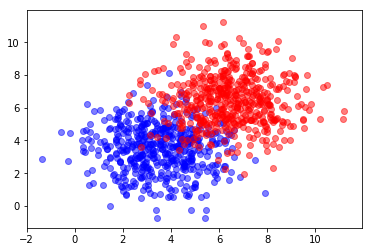

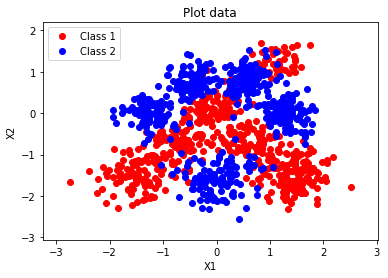

In [21]:
plot_data(X,y)

This data is not linearly separable. Hence, a classifier with a **linear class boundary** is unlikely to perform well

## D. Split the data into training and test sets

In [22]:
test_proportion = 0.25

In [23]:
arr = np.random.permutation(list(range(1000)))
test_indices = arr[:int(test_proportion*1000)]
train_indices = arr[int(test_proportion*1000):]

X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]

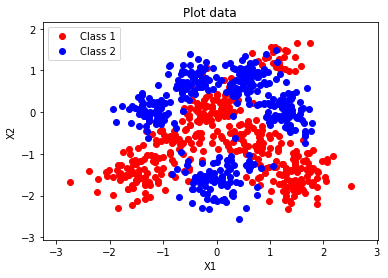

In [24]:
plot_data(X_train, y_train)

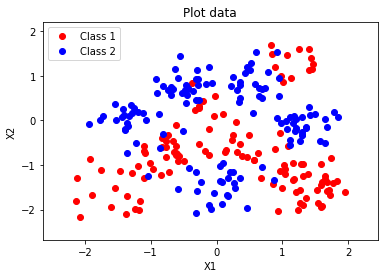

In [25]:
plot_data(X_test, y_test)

- Spliting the data into training and test sets is done by permuting a list containing numbers 1 to 1000. Then, assign the first part, e.g. 200 elements in the permuted list to test_indices and the rest to train_indices. After doing this, X_train can be obtained by calling X[train_indices]
- The test size of 200 is chosen. This was chosen to be about 20% of the whole data set since the data set is not very large

## E. Implement a logistic classification
1. Transform the psedocode from (a) into python code
2. Train the model, i.e. update the weights
3. Report log-likelihood for train & test data sets

In [26]:
X[:10]

array([[-0.62294615, -0.57879556,  1.        ],
       [ 1.09961316,  1.55006583,  1.        ],
       [ 0.75478522, -1.97615881,  1.        ],
       [-1.13634801, -0.0386258 ,  1.        ],
       [-0.12266627, -1.85082517,  1.        ],
       [-0.63001856, -1.00965567,  1.        ],
       [ 1.41677122,  0.44305545,  1.        ],
       [ 1.37633271, -0.74692372,  1.        ],
       [-1.35971326, -1.68840645,  1.        ],
       [ 1.64658978,  0.02164569,  1.        ]])

In [27]:
def compute_gradients(X, y, beta):
    gradients = ((y - logistic(X.dot(beta.T))).T).dot(X)
    return gradients

In [28]:
alpha = 0.0003 # learning rate
beta = np.random.randn(X.shape[1]) # initialise beta (weights) of shape (3,)
ll_train = []
ll_test = []
training_num = 100

In [29]:
for t in range(training_num):
    # Compute the gradients of the log-likelihood of the parameter d/dB L(B) where L(B) = logP(y|X,B)
    gradients = compute_gradients(X_train, y_train, beta)

    # Gradient descent
    beta += alpha * gradients

    # Compute Average log-likelihood
    ll_train.append(compute_average_ll(X_train, y_train, beta))
    ll_test.append(compute_average_ll(X_test, y_test, beta))

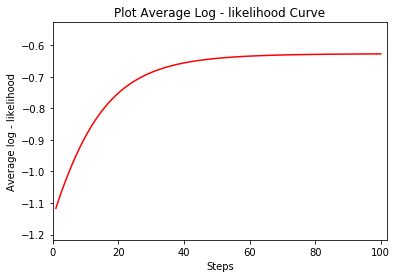

In [30]:
plot_ll(ll_train)

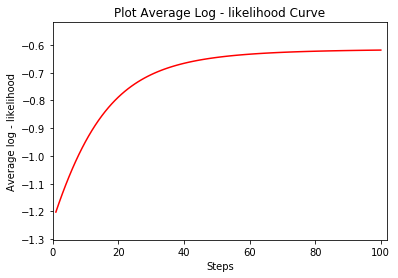

In [31]:
plot_ll(ll_test)

In [32]:
beta

array([-0.05515148,  0.72177943,  0.19916874])

In [33]:
def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((x.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde , w))

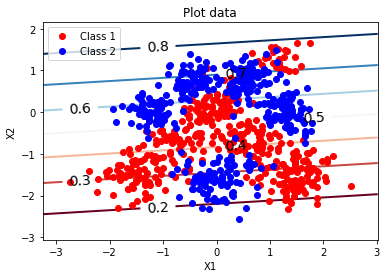

In [34]:
w = beta
plot_predictive_distribution(X_train, y_train, predict_for_plot)

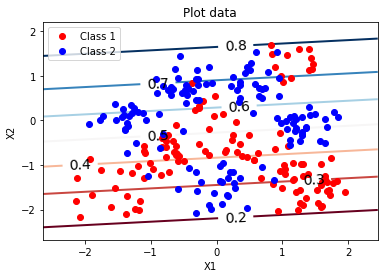

In [35]:
plot_predictive_distribution(X_test, y_test, predict_for_plot)

## F. Analyse the results (Logistic Regression)
- Final log-likelihood values
- Consusion Matrix

In [36]:
print("Final training log-likelihood per data point = " +  str(ll_train[-1]/1000))
print("Final test log-likelihood per data point = " +  str(ll_test[-1]/1000))

Final training log-likelihood per data point = -0.000627408944323
Final test log-likelihood per data point = -0.000618218419043


In [37]:
test_logits = logistic(X_test.dot(beta))
y_pred = []
for logit in test_logits:
    if logit > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
N = len(y_test)

for i in range(len(y_test)):
    if y_test[i] == 0 and y_pred[i] == 0:
        true_neg += 1
    elif y_test[i] == 1 and y_pred[i] == 1:
        true_pos += 1
    elif y_test[i] == 1 and y_pred[i] == 0:
        false_neg += 1
    else:
        false_pos += 1
        
true_neg /= N
true_pos /= N
false_neg /= N
false_pos /= N  

In [39]:
print("Confusion Matrix:\n")
print("True neg  = {}   |   False pos = {}".format(true_neg,false_pos))
print("False neg = {}   |   True pos  = {}".format(false_neg,true_pos))

Confusion Matrix:

True neg  = 0.376   |   False pos = 0.1
False neg = 0.164   |   True pos  = 0.36


## G. Use a set of radial basis function (RBFs)

In [40]:
centers = X_train[:,:2]

In [55]:
l = 0.3 #0.01 0.1 1

train_size = X_train.shape[0]
test_size = X_test.shape[0]

X_rbf_train = np.ones((train_size,1))
X_rbf_test = np.ones((test_size,1))

print(X_rbf_train.shape)
print(expand_inputs(l, X_train[:,:2], centers).shape)

X_rbf_train = np.append(X_rbf_train, expand_inputs(l, X_train[:,:2], centers) ,axis=1)
X_rbf_test = np.append(X_rbf_test, expand_inputs(l, X_test[:,:2], centers) ,axis=1)                        

(750, 1)
(750, 750)


In [57]:
print(X_rbf_train.shape)
print(X_rbf_test.shape)

(750, 751)
(250, 751)


In [58]:
alpha_rbf = 0.00009 # learning rate
beta_rbf = np.random.randn(X_rbf_train.shape[1]) # initialise beta (weights) of shape (751,)
ll_rbf_train = []
ll_rbf_test = []
training_num = 500

(751,)


In [44]:
for t in range(training_num):
    # Compute the gradients of the log-likelihood of the parameter d/dB L(B) where L(B) = logP(y|X,B)
    gradients = compute_gradients(X_rbf_train, y_train, beta_rbf)

    # Gradient descent
    beta_rbf += alpha_rbf * gradients

    # Compute Average log-likelihood
    ll_rbf_train.append(compute_average_ll(X_rbf_train, y_train, beta_rbf))
    ll_rbf_test.append(compute_average_ll(X_rbf_test, y_test, beta_rbf))

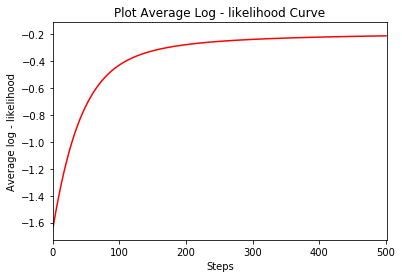

In [45]:
plot_ll(ll_rbf_train)

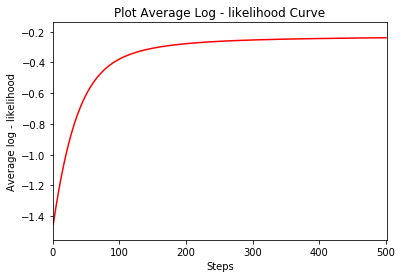

In [46]:
plot_ll(ll_rbf_test)

In [66]:
def predict_for_plot_expanded_features(x):
    x_expanded = expand_inputs(l, x, centers)
    # x_expanded = expand_inputs(l, x, centers)
    print(x.shape)
    x_tilde = np.concatenate((x_expanded, np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
    print(x_tilde.shape)
    return logistic(np.dot(x_tilde , w))

(751,)
(750, 3)
(750,)
(10000, 2)
(10000, 751)


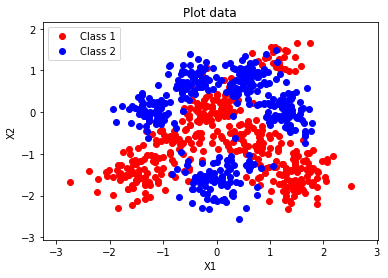

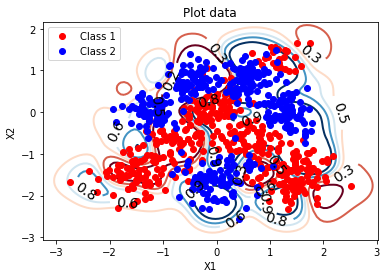

In [67]:
w = beta_rbf
print(w.shape)
print(X_train.shape)
print(y_train.shape)
plot_predictive_distribution(X_train, y_train, predict_for_plot_expanded_features)

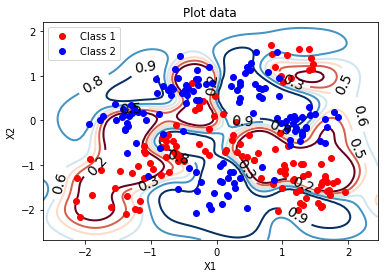

In [49]:
plot_predictive_distribution(X_test, y_test, predict_for_plot_expanded_features)

## H. Analyse the results (RBFs)

In [50]:
print("Final training log-likelihood per data point = " +  str(ll_rbf_train[-1]/1000))
print("Final test log-likelihood per data point = " +  str(ll_rbf_test[-1]/1000))

Final training log-likelihood per data point = -0.000213055723926
Final test log-likelihood per data point = -0.00023929477791


In [51]:
test_rbf_logits = logistic(X_rbf_test.dot(beta_rbf))
y_pred_rbf = []
for logit in test_rbf_logits:
    if logit > 0.5:
        y_pred_rbf.append(1)
    else:
        y_pred_rbf.append(0)

In [52]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
N = len(y_test)

for i in range(len(y_test)):
    if y_test[i] == 0 and y_pred_rbf[i] == 0:
        true_neg += 1
    elif y_test[i] == 1 and y_pred_rbf[i] == 1:
        true_pos += 1
    elif y_test[i] == 1 and y_pred_rbf[i] == 0:
        false_neg += 1
    else:
        false_pos += 1
        
true_neg /= N
true_pos /= N
false_neg /= N
false_pos /= N  

In [53]:
print("Confusion Matrix:\n")
print("True neg  = {}   |   False pos = {}".format(true_neg,false_pos))
print("False neg = {}   |   True pos  = {}".format(false_neg,true_pos))

Confusion Matrix:

True neg  = 0.452   |   False pos = 0.024
False neg = 0.068   |   True pos  = 0.456


# 3F8 FTR
- Bayesian binary
- Laplace approximation to the Logistic Classification

## A. Apply Laplace approximation